### Part 1: Critique this plan (5 points)
1\. Your CIO invited her buddy from Mountain Kol consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Mountain Kol, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Mountain Kol says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Mountain Kol's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Mountain Kol Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Mountain Kol) have a large database of consumers who can be targeted.  We will build a predictive model to estimate which of these consumers are the most likely to adopt the product, and then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that logistic regression is the best choice of method be-
cause it is a tried-and-true statistical modeling technique, and we can easily 
interpret the coefficients of the model to infer whether the attributes are stat-
istically significant, and whether they make sense. If they are statistically sig-
nificant and they do make sense, then we can have confidence that the model will 
be accurate in predicting service uptake. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the LR model predicts to be the most likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

$\color{blue}{\text{ 

1. First of all the description does not state how the model is being trained and tested. There is very less info about the training model. It is also quite ambiguous that which data is used to train and test the model. This can be resolved by explicitly stating how the model is being trained and tested. It should be trained and tested properly without any biasness.
2. Secondly, it is stated that the model is being based on the demographics. Demographics can generate social biasness. It can select some specific race or population and will train the model based on it and while applying the model it will chose the customers of specific race and ethnicity. This can be overcome by training the model on all the races or instead of demographics other features should be selected to train the model.
3. There is less infromation about the evaluation of the model. We don't know how good is the models accuray's. Statistical significance does not tell us about the accuracy rather it shows us how well the model is predicting. statistical significance can be result of chance as well.  We need to calculate the model's sensitivity, recall, accuracy, precision etc to know how effient is it. 
4. Moreover, it seems like the sample is not random which will result to biasness in the model. The model is based on the previous data of customers which makes it bias and not random. We can make it random by training model on random dataset which will rise the probability of reaching to more people. It is not the best idea to train model on only past data beacuse there might be new people who might be interested in the service. This will help in generalizability and identifiability of new customers.
5. The significance of variable/features is also not mentioned. If we know the significance of all variables and their correlation then it would be helpful to reach to many customers. We should find the variables significance and correlation to train the model properly.}}$

### Part 2: Algorithmic fairness (15 points)


#### Data acquisition and preparation (4 points)

For this question we will use the "Adult" dataset from the UC Irvine repository.

This data is from the United States census, and we will examine the algorithmic fairness for an income prediction task. For more information about the dataset, see [Here](https://archive.ics.uci.edu/ml/datasets/adult).


1\. Download the data. (1 point)

Load data from the URL using the pandas read_csv method.

In [4]:
import pandas as pd
dataset = pd.read_csv('adult.data')
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
dataset.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
dataset.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

2\. If the column headers are not correct, assign names to them (hint: use the readme from the source website). Compute descriptive statistics for the education level. (2 points).

In [6]:
dicationary = {'39': 'age', ' State-gov': 'work_class', ' 77516': 'fnlwgt', ' 13': 'education_num', ' Never-married': 'marital_status', ' Adm-clerical': 'occupation', ' Not-in-family': 'relationship', ' 2174': 'capital_gain', ' 0': 'capital_loss', ' 40': 'hours_per_week', ' United-States': 'native_country', ' Bachelors': 'Education_Level', ' White': 'Race', ' Male': 'Gender', ' <=50K': 'Income'}
dataset.rename(columns= dicationary, inplace = True)
#print(dataset.columns)
#print(len(dataset.columns))
print(dataset.head(2))
print("\n\n")
print("Descriptive Statistics for Education_Level")
print(dataset.Education_Level.describe())

   age         work_class  fnlwgt Education_Level  education_num  \
0   50   Self-emp-not-inc   83311       Bachelors             13   
1   38            Private  215646         HS-grad              9   

        marital_status          occupation    relationship    Race Gender  \
0   Married-civ-spouse     Exec-managerial         Husband   White   Male   
1             Divorced   Handlers-cleaners   Not-in-family   White   Male   

   capital_gain  capital_loss  hours_per_week  native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  



Descriptive Statistics for Education_Level
count        32560
unique          16
top        HS-grad
freq         10501
Name: Education_Level, dtype: object


3\. Select one attribute as protected. Explain the reason why you selected this attribute. (1 point)

Protected attributes require the prefix protected. The outcome attribute requires the prefix target. For example, if you need to measure fairness rankings of a dataset with the columns sex and credit_score, rename the columns to protected_sex and target_credit_Score. Update the column names for our dataset (hint: you may also have to convert the target to a binary variable and create dummy variables for those that are categorical, for upcoming steps). (1 point).

In [7]:
#I am selecting Gender as a protected attribute as it can generate social bias. Gender is not a appropriate attribute to use in this dataset because from the data i can see male have more income as compared to female 
dicationary = {'Gender': 'protected_Gender', 'Income': 'target_income', 'protected_Race': 'Race'}
dataset.rename(columns= dicationary, inplace= True)

#i also need to convert the target variable into binary numbers (0 or 1)
#Here 0 represents <=50k and 1 represents >50K
new_var1 = pd.get_dummies(dataset['target_income'])
dataset1 = pd.concat((dataset, new_var1), axis=1)
dataset1.head()

,age,work_class,fnlwgt,Education_Level,education_num,marital_status,occupation,relationship,Race,protected_Gender,capital_gain,capital_loss,hours_per_week,native_country,target_income,<=50K,>50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,0


In [8]:
#now i need to remove target_income column as we don't neet it now
dataset1 = dataset1.drop(['target_income'], axis=1)
dataset1.head()

,age,work_class,fnlwgt,Education_Level,education_num,marital_status,occupation,relationship,Race,protected_Gender,capital_gain,capital_loss,hours_per_week,native_country,<=50K,>50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1,0


In [9]:
#now we should also drop one column between <=50k and >50k
dataset2 = dataset1.drop([' <=50K'], axis=1)
dataset2.head()

,age,work_class,fnlwgt,Education_Level,education_num,marital_status,occupation,relationship,Race,protected_Gender,capital_gain,capital_loss,hours_per_week,native_country,>50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [10]:
#now lets rename >50k to as target_variable
dataset2.rename(columns = {' >50K': 'target_income'}, inplace=True)
dataset2.head()

,age,work_class,fnlwgt,Education_Level,education_num,marital_status,occupation,relationship,Race,protected_Gender,capital_gain,capital_loss,hours_per_week,native_country,target_income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [11]:
#i need to convert all the string data into numeric as the classification algorithm will not work for string values
new_var2 = pd.get_dummies(dataset2['work_class'])
dataset3 = pd.concat((dataset2, new_var2), axis=1)
dataset3 = dataset3.drop(['work_class'], axis=1)
dataset3.head()
#dataset2['work_class'].value_counts('?')

,age,fnlwgt,Education_Level,education_num,marital_status,occupation,relationship,Race,protected_Gender,capital_gain,capital_loss,hours_per_week,native_country,target_income,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,0,0,0,0,0,1,0,0
1,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0
2,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0
3,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,0,0,0,1,0,0,0,0
4,37,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0


In [12]:
#i need to convert all the string data into numeric as the classification algorithm will not work for string values
new_var3 = pd.get_dummies(dataset2['Education_Level'])
dataset4 = pd.concat((dataset3, new_var3), axis=1)
dataset4 = dataset4.drop(['Education_Level'], axis=1)
dataset4.head()

,age,fnlwgt,education_num,marital_status,occupation,relationship,Race,protected_Gender,capital_gain,capital_loss,hours_per_week,native_country,target_income,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,50,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,38,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,53,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,37,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
#i need to convert all the string data into numeric as the classification algorithm will not work for string values
new_var4 = pd.get_dummies(dataset2['marital_status'])
dataset5 = pd.concat((dataset4, new_var4), axis=1)
dataset5 = dataset5.drop(['marital_status'], axis=1)
dataset5.head()

,age,fnlwgt,education_num,occupation,relationship,Race,protected_Gender,capital_gain,capital_loss,hours_per_week,native_country,target_income,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,50,83311,13,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,38,215646,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,53,234721,7,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,28,338409,13,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,37,284582,14,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [14]:
#i need to convert all the string data into numeric as the classification algorithm will not work for string values
new_var5 = pd.get_dummies(dataset2['occupation'])
dataset6 = pd.concat((dataset5, new_var5), axis=1)
dataset6 = dataset6.drop(['occupation'], axis=1)
dataset6.head()

,age,fnlwgt,education_num,relationship,Race,protected_Gender,capital_gain,capital_loss,hours_per_week,native_country,target_income,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,50,83311,13,Husband,White,Male,0,0,13,United-States,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,38,215646,9,Not-in-family,White,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,53,234721,7,Husband,Black,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,28,338409,13,Wife,Black,Female,0,0,40,Cuba,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,37,284582,14,Wife,White,Female,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
#i need to convert all the string data into numeric as the classification algorithm will not work for string values
new_var6 = pd.get_dummies(dataset2['relationship'])
dataset7 = pd.concat((dataset6, new_var6), axis=1)
dataset7 = dataset7.drop(['relationship'], axis=1)
dataset7.head()

,age,fnlwgt,education_num,Race,protected_Gender,capital_gain,capital_loss,hours_per_week,native_country,target_income,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,50,83311,13,White,Male,0,0,13,United-States,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,38,215646,9,White,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,53,234721,7,Black,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,28,338409,13,Black,Female,0,0,40,Cuba,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,37,284582,14,White,Female,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
#i need to convert all the string data into numeric as the classification algorithm will not work for string values
new_var7 = pd.get_dummies(dataset2['Race'])
dataset8 = pd.concat((dataset7, new_var7), axis=1)
dataset8 = dataset8.drop(['Race'], axis=1)
dataset8.head()

,age,fnlwgt,education_num,protected_Gender,capital_gain,capital_loss,hours_per_week,native_country,target_income,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,50,83311,13,Male,0,0,13,United-States,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,38,215646,9,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,53,234721,7,Male,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,Female,0,0,40,Cuba,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,37,284582,14,Female,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [17]:
#i need to convert all the string data into numeric as the classification algorithm will not work for string values
new_var8 = pd.get_dummies(dataset2['protected_Gender'])
dataset9 = pd.concat((dataset8, new_var8), axis=1)
dataset9 = dataset9.drop(['protected_Gender'], axis=1)
dataset9 = dataset9.rename(columns={' Female': 'protected_female', ' Male': 'protected_male'})
dataset9.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country,target_income,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,protected_female,protected_male
0,50,83311,13,0,0,13,United-States,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,38,215646,9,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,53,234721,7,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,28,338409,13,0,0,40,Cuba,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,37,284582,14,0,0,40,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [18]:
#i need to convert all the string data into numeric as the classification algorithm will not work for string values
new_var9 = pd.get_dummies(dataset2['native_country'])
dataset10 = pd.concat((dataset9, new_var9), axis=1)
dataset10 = dataset10.drop(['native_country'], axis=1)
dataset10.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target_income,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,protected_female,protected_male,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
len(dataset10.columns)

109

In [20]:
#making target_income as the last column
move_column = dataset10.pop("target_income")
dataset10.insert(108, "target_income", move_column)
dataset10.tail()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,protected_female,protected_male,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,target_income
32555,27,257302,12,0,0,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32556,40,154374,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32557,58,151910,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32558,22,201490,9,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32559,52,287927,9,15024,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


#### Build a Classifier (5 points)

4\. Select a type of classifier to build for the income prediction task. Give reasoning for why you picked this type. (1 point)

$\color{blue}{\text{ I would prefer to use any binary classification as the target variable has two outputs such as <=50k(0) and >50k(1).}}$

5\. Split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn. (1 point)


In [21]:
# #here i am imorting pandas because i am using pandas's sample function to classify dataset into train and test
import numpy as np
import pandas as pd

# #approx 80% of data will be utilized to train our model
train = dataset10.sample(frac = 0.8, axis=0, random_state = 30)
x_train = train.drop('target_income', axis=1)
y_train = train.target_income

#data testing 
test = dataset10.drop(train.index)
x_test = test.drop('target_income', axis=1)
y_test = test.target_income

#data testing on protected_female and specified target-female
female = test.loc[test.protected_female == 1]
female_test = female.drop('target_income', axis=1)
female_target = female.target_income

#data testing on protected_female and specified target-female
male = test.loc[test.protected_female == 0]
male_test = male.drop('target_income', axis=1)
male_target = male.target_income


6\. On the training set, implement your classifier. Give reasoning for your choice of any hyperparameter(s). (1 point)

In [22]:
# C = 1e30, max_iter = 33000 are hyperparamaters. I did hyperparater tunning and I got the following values of c and max_teration. Hyperparater gives best accuray for these values
import sklearn as sk
from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(C = 1e30, max_iter = 32560)
classifer.fit(x_train,y_train)

y_predict = classifer.predict(x_test)

p_lr = classifer.predict_proba(x_test)[:,1]


print(len(p_lr))
print(len(x_test))

6512
6512


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_predict, y_test))

0.8002149877149877


7\. To demonstrate the performance of your classifier, we will now plot the AUROC. Below are two functions which you can use. What you need to add is code to plot the AUROC for all the data and as well for each value of the protected attribute (on one set of axes). (2 points)

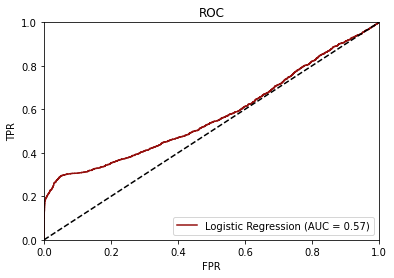

In [24]:
#Code for computing the AUCROC

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def getAUC(truth, pred):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    return auc(fpr, tpr)


def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label = lab +' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

#Add code below to subset rows by protected attribute

#Add code below to make the plot    
plotAUC(y_test, p_lr, 'Logistic Regression')

In [25]:
dataset10.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,protected_female,protected_male,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,target_income
0,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


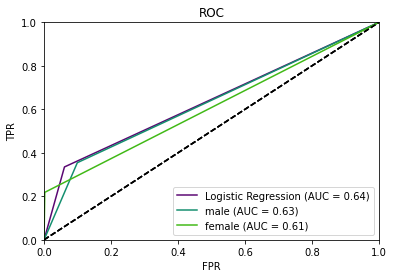

In [27]:

train = dataset10.sample(frac = 0.8, axis=0, random_state = 42)
x_train = train.drop('target_income', axis=1)
y_train = train.target_income

test = dataset10.drop(train.index)
x_test = test.drop('target_income', axis=1)
y_test = test.target_income

male = test.loc[test.protected_female == 0]
male_test = male.drop('target_income', axis=1)
male_target = male.target_income

female = test.loc[test.protected_female == 1]
female_test = female.drop('target_income', axis=1)
female_target = female.target_income

from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(C = 1e30, max_iter = 32560)
classifer.fit(x_train,y_train)


#here i am predicting for general data, female, and male
datapred = classifer.predict(x_test)
female_pred = classifer.predict(female_test)
male_pred = classifer.predict(male_test)


#Code for computing the AUCROC

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def getAUC(truth, pred):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    return auc(fpr, tpr)


def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label = lab +' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

#Add code below to subset rows by protected attribute

#Add code below to make the plot    
plotAUC(y_test, datapred, 'Logistic Regression')
plotAUC(male_target, male_pred, 'male')
plotAUC(female_target, female_pred, 'female')

In [28]:
print(p_lr)

[0.22079199 0.17640163 0.31829567 ... 0.15896535 0.18465701 0.23311246]


#### Assessing algorithmic fairness (5 points)

8\. Algorithmic Fairness metrics (2 points) 

Pick a fairness metric to apply to the income prediction task and your selected protected attribute. Explain why you selected this metric. 

$\color{blue}{\text{ Here i am finding geometric mean because the dataset is imbalanced and I need to balance between sensitivity and specificity. I am using this metric to measures the balance between classification performances on both protected variables. A low G-Mean is an indication of a poor performance in the classification of the positive cases even if the negative cases are correctly classified as such. As i have selected gender(male and female) as my protected attributes. I will find true positive and false positive rates for protected attributes and will find how they vary.
The geometric mean normalizes the number ranges giving each property equal weight in the average.}}$

9\. Compute the chosen metric for your protected attribute. Hint: this will require you to first find the threshold wiith the best when predicting on the entire data, and then computing the TPR/FPR or other necessary parameters at that threshold for each value of the protected attribute. (2 points)

There are many ways we could locate the threshold with the optimal balance between the false positive rate (FPR) and true positive rate (TPR).

As a reminder, the TPR is called the Sensitivity. The inverse of the false-positive rate (1-FPR) is called the Specificity.

<center>Sensitivity = $\frac{TP}{TP + FN}$
Specificity = $\frac{TN}{FP + TN}$</center>

where:

<center>Sensitivity = TPR and Specificity = 1 – FPR</center>

The Geometric Mean or g-mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

<center>g-mean = $\sqrt{Sensitivity * Specificity}$ </center>



In [29]:
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

def false_positive_rate(male_target, male_pred):
    tn, fp, fn, tp = confusion_matrix(male_target, male_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity
#gmm denotes the geometric mean for male and gmf denotes geometric mean for female

#here recall_score function calculates sensitivity and false_positive_rate calculates specificity
#then we are multiplying them and took square root and finding geometric mean for male and females

gmm = np.sqrt(recall_score(male_target,male_pred) * false_positive_rate(male_target, male_pred))
gmf = np.sqrt(recall_score(female_target,female_pred) * false_positive_rate(female_target,female_pred))

compare = gmm == gmf

print(compare)

False


In [30]:
print(gmm)
print(gmf)

0.5651386601515362
0.4666234627905692


In [31]:
print(false_positive_rate(male_target, male_pred))
print(false_positive_rate(female_target,female_pred))

print("the true positive rate for males is ", recall_score(male_target,male_pred))
print("the true positive rate for females is ", recall_score(female_target,female_pred))

0.9006974427100631
0.9979633401221996
the true positive rate for males is  0.3545937737281701
the true positive rate for females is  0.21818181818181817


### Part 2 Bonus: Unsupervised learning (10 points)

In this section we will use unsupervised learning to understand if there are latent groups of people in the census data. As we discussed in class, a latent group refers to an unobserved group membership (i.e., undefined with any sort of label) but rather inferred based on attributes in the data. As unsupervised learning is commonly used in supervised learning tasks, we can also examine if an understanding of such latent groups can improve performance of our income prediction task.


8\. Choose an unsupervised learning method for assessing latent group membership. Why do you pick this method? (1 point).

In [32]:
dataset10.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,protected_female,protected_male,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,target_income
0,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


9\. Implement the method on the adult dataset. You will have to decide what pre-processing is needed (e.g. scaling the data, use of dummy variables, etc.). Describe how you select any hyperparameter(s). Also, you should evaluate your implementation. (7 points).

In [33]:
#here i am dividing my data into df and target where df includes all the data except the last column
# target includes only the last column
dataset10_x = dataset10.iloc[:, :-1]
dataset10_y = dataset10.iloc[:, -1]

In [34]:
#lets now scale our data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset10_x)

scaled_data = scaler.transform(dataset10_x)

In [38]:
#now lets apply PCA (principal Component Analysis) using all the features except the target faeture
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

df_pca = pca.transform(scaled_data)
scaled_data.shape

(32560, 108)

In [39]:
# here we can see the the dimention of our data and it includes all the rows and independent faetures
scaled_data.shape

(32560, 108)

In [40]:
#here we have compressed or reduced all the faetures into just two features
df_pca.shape

(32560, 2)

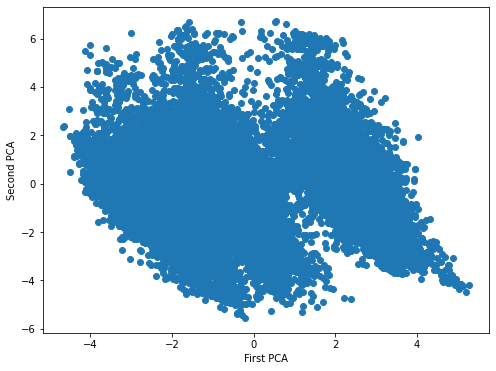

In [41]:
#now lets plot a graph and asses 

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('First PCA')
plt.ylabel('Second PCA')
plt.show()

# Scaling 

In [42]:
#first we need to scale using the standardscaler

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df = scaler.fit_transform(dataset10)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df_pca)

# Elbow Method

In [ ]:
#lets apply elbow method to calculate the approximate number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#i need to find the best value of k so i am using for loop
k_clusters = range(1, 15)

#sum of square errors i am using an empty array to store the sum of errors
sum_Square_errors = []
for i in k_clusters:
    km = KMeans(n_clusters = i)
    km.fit(df_pca)
    sum_Square_errors.append(km.inertia_)

In [ ]:
sse

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('K')
plt.ylabel('Sum of squares')
plt.plot(k_clusters, sum_Square_errors)

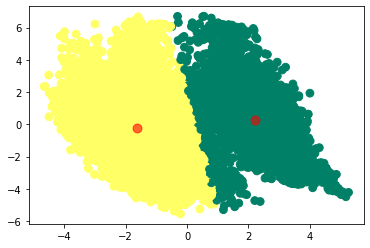

In [157]:
# n_clusters is hyperparamater in k-means clustering. the number of clusters tell us how the data is spread.


my_data = df_pca
#making two clusters

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_pca)
y_kmeans = kmeans.predict(df_pca)

#ploting for the two dimentional data after PCA
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = y_kmeans, s=60, cmap='summer')

#specifying centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s=80, alpha = 0.6)


# Evaluation

Unlike supervised learning, where we have the ground truth to evaluate the model's performance, clustering analysis being unsupervised lacks a strong evaluation metric to compare the results of various clustering algorithms. Furthermore, because kmeans takes k as an input and does not learn it from data, there is no correct answer in terms of how many clusters we should have in each case. In some cases, domain knowledge and intuition can aid, but this is not always the case. Because clusters are employed in downstream modeling, we can use the cluster-predict methodology to assess how well the models are doing based on different K clusters.
We can use ELbow method to know about the number of clusters which will tell us how the data is spread. In the above graph we can see that there are two distinct clusters. One is green and other is yellow. the green cluster is very dense and there seems to be very less variance but in the yellow cluster there is high variance.
Although the graph does not give us discrete info about the data, still it gives us a sense that there can be two clusters which is similar to our original data where there are two catogries in our target variable: 0 and 1. The Elbow method has calculated the right number of clusters as in our target variable there are only two classes 0 and 1. 0 represents the income <=50K and 1 represents >50K.  

10. Examine the resulting clusters. What can be interpreted about them? (2 points).

$\color{blue}{\text{ There are two clusters: one yellow and other green, in the above graph and majority of data lies around the two center points. The size of yellow cluster is slightly larger than the green one. The yellow cluster represents the male income (greater than 50K) which is higher than the female income which is represented by green cluster. As unsupervised algorithms usually give less accurate results rather they give us clusters of data which is centered around centriods. We have also seen from the supervised learning that the number of males who have greater income are more in nujmber than females.

Though the results are not clear like supervised learning because I have reduced the exact feature to two using PCA then feed that to K-means. due to which there is less claraity and less accuracy.}}$